In [1]:
path_data = 'Bridging_the_digital_divide/data/'

dest_path = "/".join([path_data, "clip_big_G_processed_imgs/"])
path = "Bridging_the_digital_divide/CLIP_other_versions/ViT_L_14"

In [2]:
import pandas as pd
import numpy as np
import os



In [3]:
processed_images = [filename for filename in os.listdir(dest_path)]
len(processed_images)

35353

In [4]:
csv_list = [filename for filename in os.listdir(path) if filename.split(".")[-1] == "csv"]
csv_list.remove("images_v2_nosub.csv")

csv_list.remove("vit_l14_results.csv")
len(csv_list)     

1

In [6]:
results_df = pd.concat(map(pd.read_csv, csv_list))

In [7]:
len(results_df)

35353

In [9]:
results_df.head()

,Unnamed: 0,Unnamed: 0.1,id,country.name,country.id,topics,income,CLIP score
0,0,37685,5d4be10ecf0b3a0f3f33a5f3,India,in,Source of cool,6606.0,0.327979
1,1,37686,5d4be10ecf0b3a0f3f33a5f5,India,in,rehabilitation technology,6606.0,0.227113
2,2,37687,5d4be10ecf0b3a0f3f33a5f7,India,in,Play area,6606.0,0.401194
3,3,37688,5d4be10ecf0b3a0f3f33a5f9,India,in,Pen/pencils,6606.0,0.371167
4,4,37689,5d4be10ecf0b3a0f3f33a5fb,India,in,Power outlet,6606.0,0.319972


In [10]:
results_df.to_csv("vit_G14_results.csv")

In [11]:
data = results_df

In [12]:
data.loc[data['income'].between(0, 100, 'both'), 'bin'] = 'a_0-100'
data.loc[data['income'].between(100, 200, 'right'), 'bin'] =  'b_100-200'
data.loc[data['income'].between(200, 400, 'right'), 'bin'] = 'c_200-400'
data.loc[data['income'].between(400, 800, 'right'), 'bin'] =  'd_400-800'
data.loc[data['income'].between(800, 1600, 'right'), 'bin'] = 'e_800-1600'
data.loc[data['income'].between(1600, 3200, 'right'), 'bin'] = 'f_1600-3200'
data.loc[data['income'].between(3200, 6400, 'right'), 'bin'] = 'g_3200-6400'
data.loc[data['income'].between(6400, 12800, 'right'), 'bin'] = 'h_6400-12800'
data.loc[data['income'].between(12800, 25600, 'right'), 'bin'] = 'i_12800-25600'

In [13]:
bin_unique = data['bin'].unique()
bin_range = [str(int(data[data['bin'] == i]['income'].min())) + '-' + str(int(data[data['bin'] == i]['income'].max())) 
                for i in bin_unique]
bin_count = [data[data['bin'] == i]['income'].count() for i in bin_unique]


bin_df = pd.DataFrame()
bin_df['bin'] = bin_unique
bin_df['bin_value_range'] = bin_range
bin_df['bin_count'] = bin_count

<AxesSubplot:xlabel='bin'>

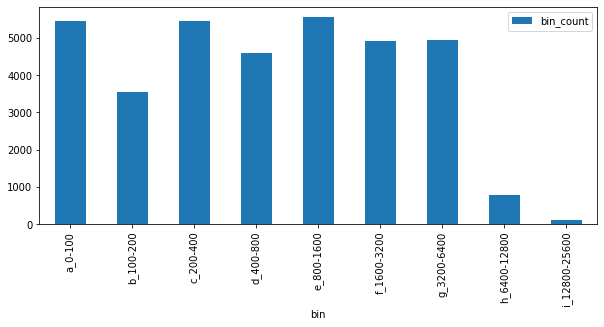

In [14]:
bin_df.sort_values('bin').plot.bar(x='bin', y='bin_count', figsize=(10,4))   # replace labels in plot

In [15]:
# Calculating average CLIP scores for each bin
avg_list = [0] * len(data)
data['avg_clip_score'] = avg_list 

for i in data['bin'].unique():
  data.loc[data['bin'] == i, 'avg_clip_score'] = data[data['bin']==i]['CLIP score'].mean()

<AxesSubplot:xlabel='bin', ylabel='avg_clip_score'>

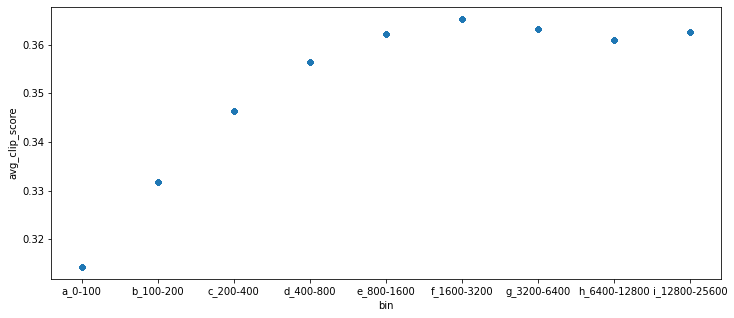

In [16]:
data.sort_values('bin').plot.scatter(x='bin', y='avg_clip_score', figsize=(12,5))   #put more information, add connecting line, (mean, min, max, median)

In [17]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [18]:
sns.set_theme(style='whitegrid', context='paper', font_scale=2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/tmp/ipykernel_372691/842798368.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(('(0, 100]', '(100, 200]','(200, 400]', '(400, 800]', '(800, 1600]', '(1600, 3200]', '(3200, 6400]', '(6400, 12800]', '(12800, 25600]'))


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '(0, 100]'),
  Text(1, 0, '(100, 200]'),
  Text(2, 0, '(200, 400]'),
  Text(3, 0, '(400, 800]'),
  Text(4, 0, '(800, 1600]'),
  Text(5, 0, '(1600, 3200]'),
  Text(6, 0, '(3200, 6400]'),
  Text(7, 0, '(6400, 12800]'),
  Text(8, 0, '(12800, 25600]')])

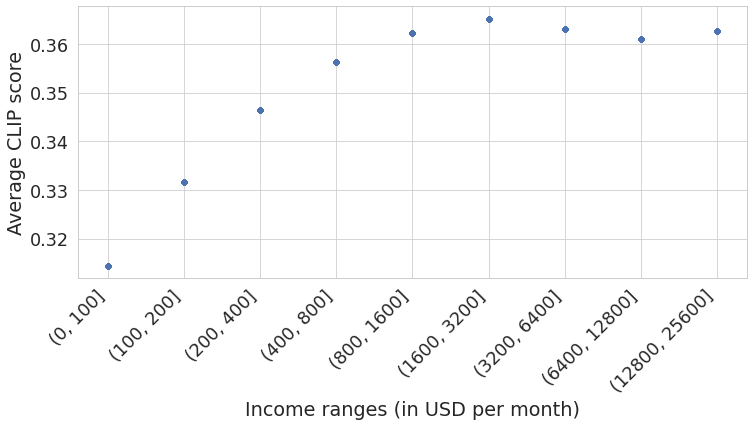

In [19]:
a = data.sort_values('bin').plot.scatter(x='bin', y='avg_clip_score', figsize=(12,5))   #put more information, add connecting line, (mean, min, max, median)
a.set_xticklabels(('(0, 100]', '(100, 200]','(200, 400]', '(400, 800]', '(800, 1600]', '(1600, 3200]', '(3200, 6400]', '(6400, 12800]', '(12800, 25600]'))
a.set_xlabel("Income ranges (in USD per month)")
a.set_ylabel("Average CLIP score")

plt.xticks(rotation=45, ha='right')

In [20]:
labels=["a_poor", "b_lower-middle", "c_upper-middle", "d_rich"]

data["quartile"] = pd.qcut(data["income"], q=[0, 0.25, 0.5, 0.75, 1],     # 25% 50%, 75%, 100%
                         labels=labels)

In [21]:
print('d_rich : ' + str(data[data['quartile'] == 'd_rich']['income'].min()) + '-' + str(data[data['quartile'] == 'd_rich']['income'].max())+ ', count= ' + str(data[data['quartile'] == 'd_rich']['income'].count()) )
print('c_upper-middle: ' + str(data[data['quartile'] == 'c_upper-middle']['income'].min()) + '-' + str(data[data['quartile'] == 'c_upper-middle']['income'].max())+ ', count= ' + str(data[data['quartile'] == 'c_upper-middle']['income'].count()) )
print('b_lower-middle: ' + str(data[data['quartile'] == 'b_lower-middle']['income'].min()) + '-' + str(data[data['quartile'] == 'b_lower-middle']['income'].max())+ ', count= ' + str(data[data['quartile'] == 'b_lower-middle']['income'].count()) )
print('a_poor: ' + str(data[data['quartile'] == 'a_poor']['income'].min()) + '-' + str(data[data['quartile'] == 'a_poor']['income'].max())+ ', count= ' + str(data[data['quartile'] == 'a_poor']['income'].count()) )

d_rich : 2001.0-19671.0, count= 8786
c_upper-middle: 694.0-1998.0, count= 8788
b_lower-middle: 195.4533587-685.0, count= 8858
a_poor: 26.99458113-195.0, count= 8921


In [22]:
quartile_unique = data['quartile'].unique()
quartile_list = [str(int(data[data['quartile'] == i]['income'].min())) + '-' + str(int(data[data['quartile'] == i]['income'].max())) 
                for i in quartile_unique]
quartile_list_count = [data[data['quartile'] == i]['income'].count() for i in quartile_unique]


quartile_df = pd.DataFrame()
quartile_df['quartile_range'] = quartile_list
quartile_df['quartile_list_count'] = quartile_list_count

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


d_rich
c_upper-middle
a_poor
b_lower-middle


<AxesSubplot:xlabel='quartile', ylabel='avg_clip_score_quartile'>

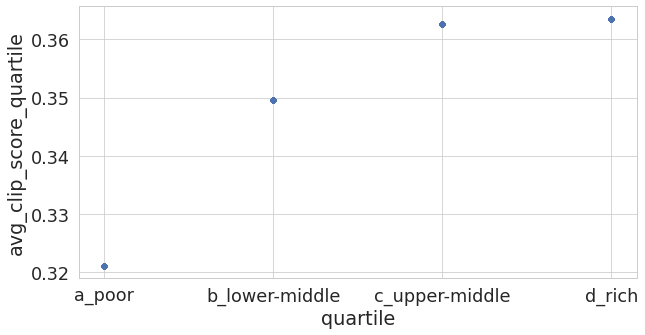

In [23]:
avg_list = [0] * len(data)
data['avg_clip_score_quartile'] = avg_list

for i in data['quartile'].unique():
    print(i)
    data.loc[data['quartile'] == i, 'avg_clip_score_quartile'] = data[data['quartile']==i]['CLIP score'].mean()

data.sort_values('quartile').plot.scatter(x='quartile', y='avg_clip_score_quartile', figsize=(10,5))

In [24]:
data.groupby(['quartile'])['CLIP score'].mean()

quartile
a_poor            0.321134
b_lower-middle    0.349616
c_upper-middle    0.362525
d_rich            0.363499
Name: CLIP score, dtype: float64

In [25]:
data.groupby(['quartile'])['CLIP score'].median()

quartile
a_poor            0.323244
b_lower-middle    0.353466
c_upper-middle    0.367666
d_rich            0.368047
Name: CLIP score, dtype: float64

<AxesSubplot:xlabel='quartile', ylabel='CLIP score'>

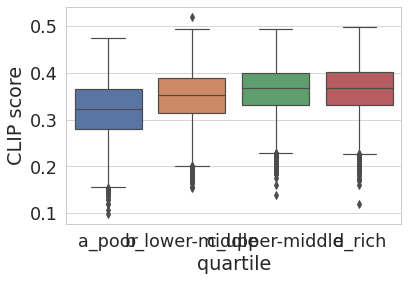

In [26]:
sns.boxplot(data=data, x='quartile', y='CLIP score')

In [28]:
quartile_df['avg_clip_score'] = [round(i, 3) for i in data['avg_clip_score_quartile'].unique()]
quartile_df

,quartile_range,quartile_list_count,avg_clip_score
0,2001-19671,8786,0.363
1,694-1998,8788,0.363
2,26-195,8921,0.321
3,195-685,8858,0.350
